<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/ForcatingModel_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/airline_passengers.csv", index_col="Month", parse_dates=True)
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [29]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [30]:
data.index.freq = 'MS'
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [31]:
data.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


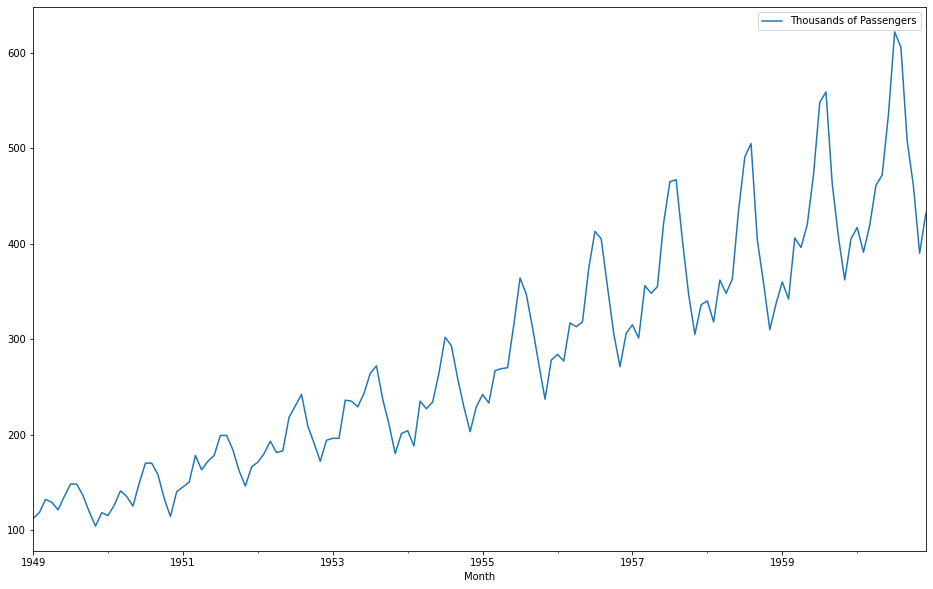

In [32]:
data.plot(figsize=(16,10))

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [34]:
train_data = data.iloc[:109]
test_data = data.iloc[108:]

In [35]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [36]:
test_prediction = fitted_model.forecast(36) # 12 month year we using 3 yaer
test_prediction.head()

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
Freq: MS, dtype: float64

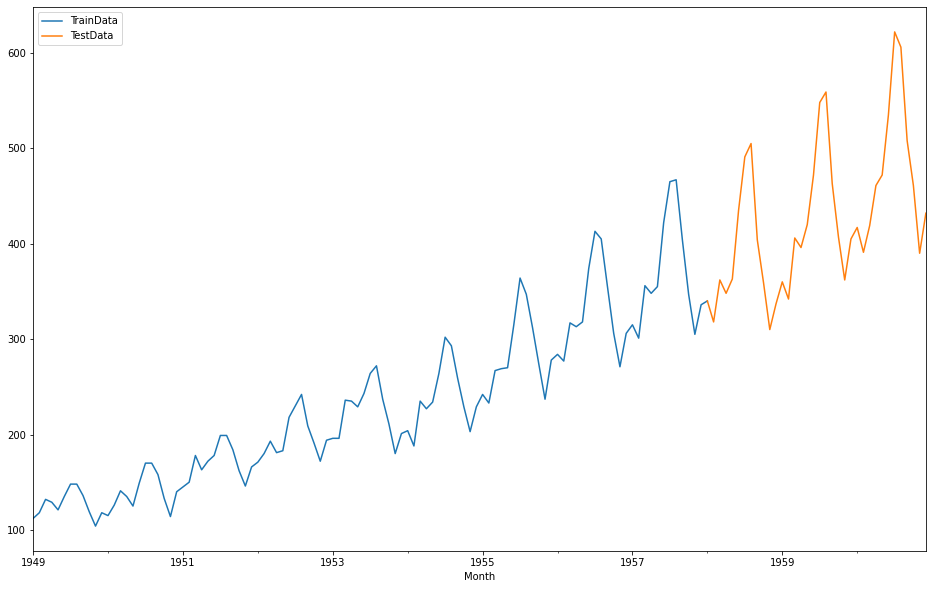

In [37]:
train_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TrainData')
test_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TestData')

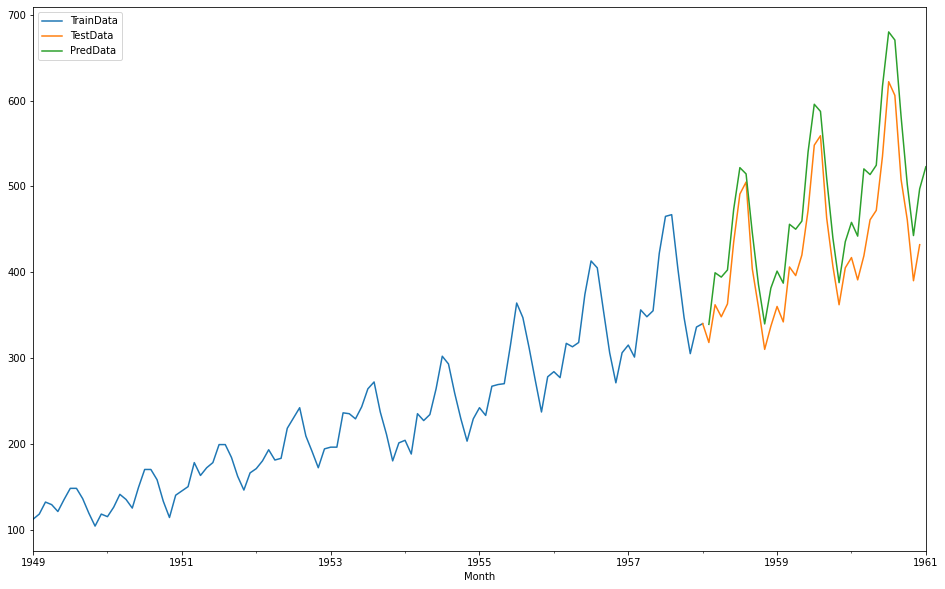

In [38]:
train_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TrainData')
test_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TestData')
test_prediction.plot(figsize=(16,10), legend=True, label='PredData')

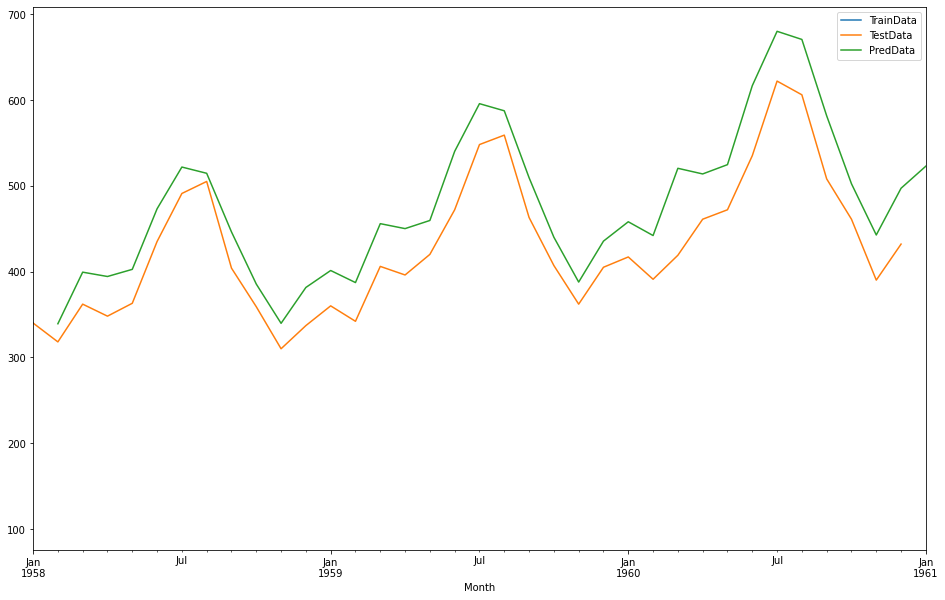

In [39]:
train_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TrainData')
test_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TestData')
test_prediction.plot(figsize=(16,10), legend=True, label='PredData', xlim=['1958-01-01', '1961-01-01'])

**Evaluation of Model**

In [40]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [41]:
mean_absolute_error(test_data, test_prediction)

63.03138491847624

In [42]:
mean_squared_error(test_data, test_prediction)

5614.4207149269

In [43]:
np.sqrt(mean_squared_error(test_data, test_prediction))

74.92943823976594

In [46]:
final_model = ExponentialSmoothing(data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [48]:
final_prediction = final_model.forecast(36)
final_prediction.head()

1961-01-01    450.679728
1961-02-01    424.824052
1961-03-01    475.508514
1961-04-01    504.075221
1961-05-01    517.876390
Freq: MS, dtype: float64

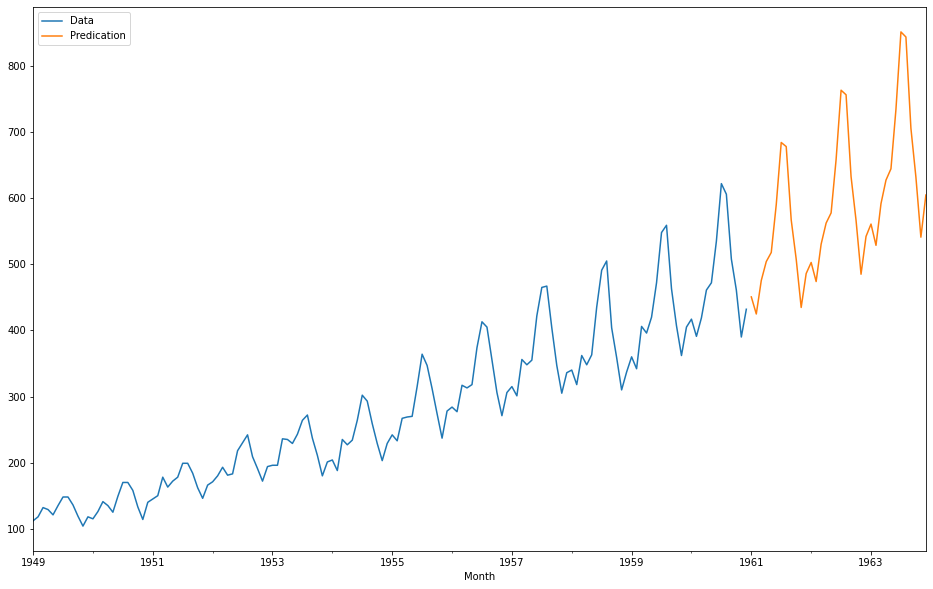

In [50]:
data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='Data')
final_prediction.plot(figsize=(16,10), legend=True, label='Predication')